In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from cosmo4d.config import Config

In [3]:
config = Config('nersc/grigor-128')

[ 000000013.932 ] transfer [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.]


/global/u1/y/yfeng1/source/hmc/cosmo4d/cosmo4d/models.py:65: RuntimeWarning: invalid value encountered in true_divide
  t = abs((r_data.power['power'] / r_model.power['power']) ** 0.5)


In [4]:
def report_fisher(ax, config, F, Phat, Ptruth, K):
#    for i, row in enumerate(F):
#        _ = ax.plot(config.parametrization.tags, row, color=cm.spectral(1.0 * i / len(F)))

    ax.plot(config.parametrization.tags,
            ((Phat / Ptruth) ** 2 * numpy.diag(K)) ** 0.5, color='k', label='Analytic')
    ax.plot(config.parametrization.tags, numpy.diag(K) ** 0.5, color='gray', ls='--',
            label='Upper Limit')
            
    ax.plot(config.parametrization.tags, numpy.diag(F) ** 0.5,  color='red',
            marker='x', ls='none', label='Measured')
    
    ax.set_ylim(-1, 100)
    ax.set_xlabel(r'$k$ $[h\mathrm{Mpc}^{-1}]$')
    ax.set_ylabel('1 / Error')


In [113]:
T, F, K, Phat0, Ptruth0 = config.load_window()
# K is N **2 / (2 * Theta)
bad = (numpy.diag(F) < 1.0)
I = numpy.eye(F.shape[0])
I = K
#F[bad] = I[bad] * 1e-3
#F.T[bad] = I[bad] * 1e-3
#F[I == 0] = 0
#F = K
#F=abs(F)
shat = config.load_map('naive-map-shat', 's')
struth = config.load_map('naive-map-shat', 's_truth')
data = config.load_map('naive-map-shat', 'data_pure')
noise = config.load_map('naive-map-shat', 'noise')
dlink_truth = config.forward_model.compute(struth, 'dlinear_k')

Phat = config.parametrization.estimate(shat)
Ptruth = config.parametrization.estimate(struth)
Pdata = config.parametrization.estimate(((data+noise).r2c() / dlink_truth).c2r())
M1 = numpy.linalg.inv(F)
M2 = numpy.eye(F.shape[0]) / (F.sum(axis=1)[:, None])

(-0.1, 5)

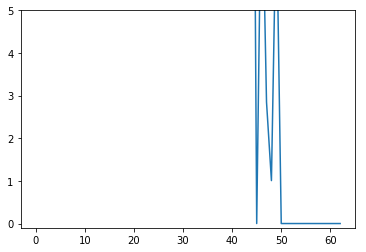

In [6]:
plot(diag(F))
ylim(-0.1, 5)

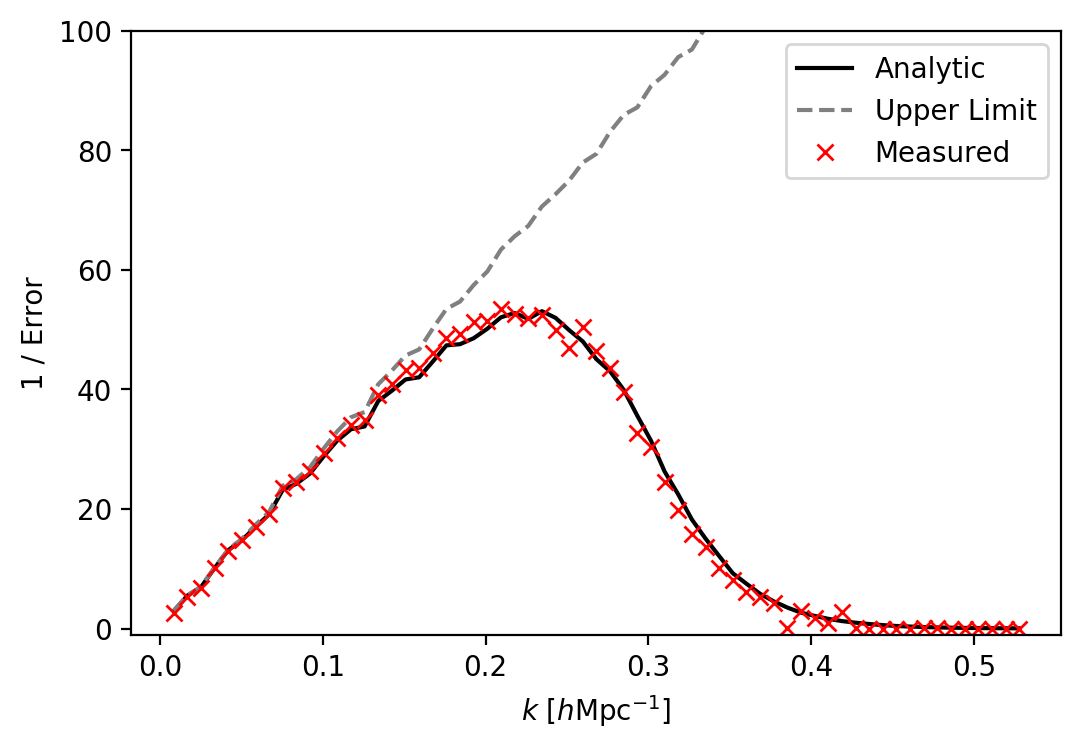

In [7]:
fig = figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)
mask = numpy.ones_like(F)
#mask[bad] = nan
report_fisher(ax, config, F * mask, Phat, Ptruth, K)
legend()
savefig(config.makepath('Grigor-inv-Error.pdf'))
savefig(config.makepath('Grigor-inv-Error.eps'))

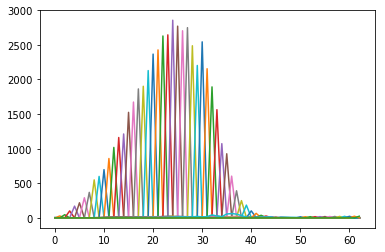

In [11]:
_ = plot(F.T)

In [29]:
W = M2.dot(F)

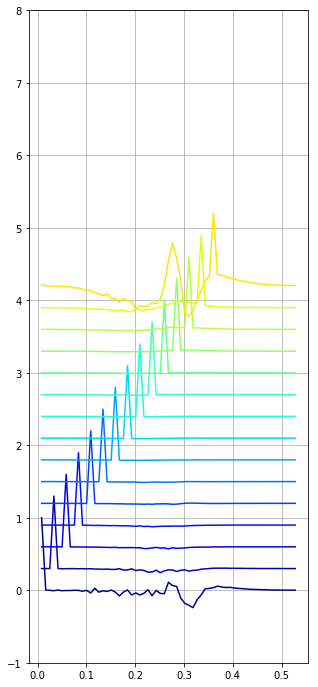

In [41]:
figure(figsize=(5, 12))
ax = gca()

for i, row in enumerate(F[:44]):
    if i % 3: continue
    _ = ax.plot(config.parametrization.tags, row / row[i] + i * 0.1, color=cm.jet(1.0 * i / len(W)))
ylim(-1, 8)
grid()

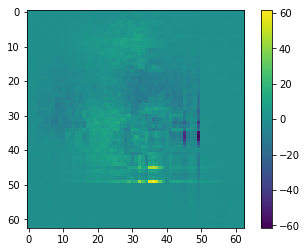

In [24]:
imshow((F - F.T) / diag(F))
colorbar()

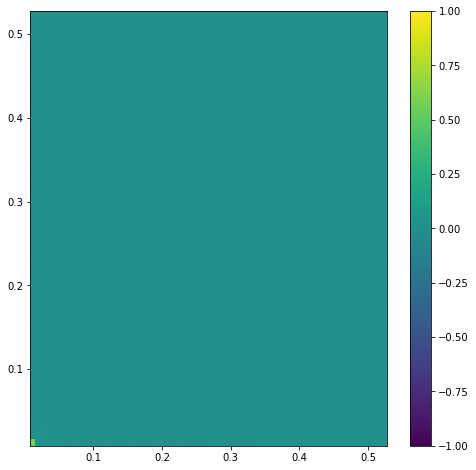

In [8]:
figure(figsize=(8, 8))
M3 = numpy.eye(F.shape[0]) / (F.sum(axis=1)[:, None])
pcolormesh(config.parametrization.tags, config.parametrization.tags, M3.dot(T), vmin=-1, vmax=1)
colorbar()


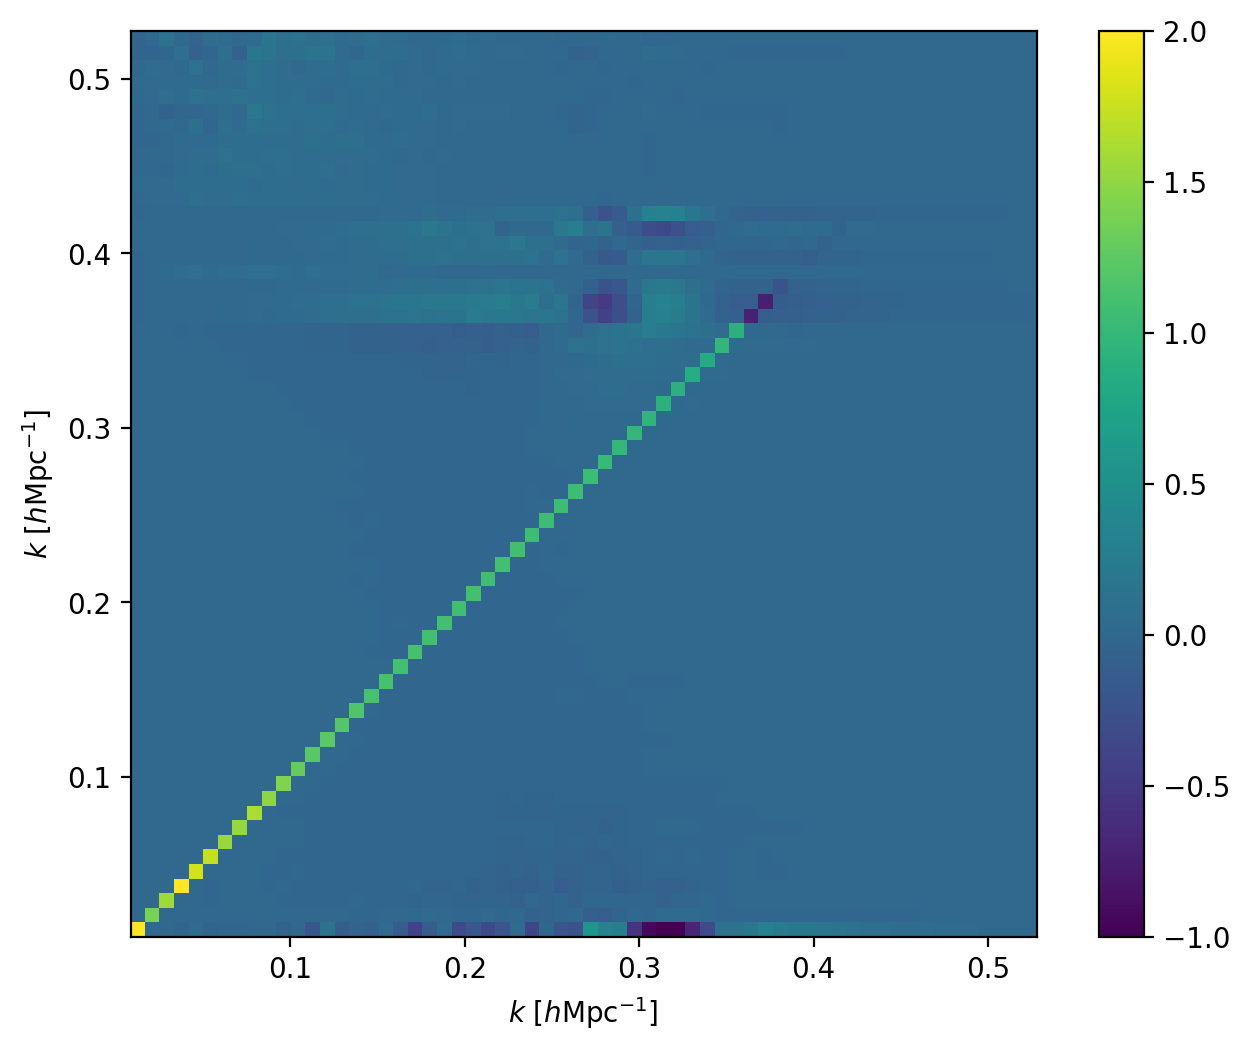

In [32]:
figure(figsize=(8, 6), dpi=200)
ax = gca()
im = ax.pcolormesh(config.parametrization.tags, config.parametrization.tags, M2.dot(F), vmin=-1, vmax=2)

colorbar(im)
ax.set_aspect(1.0)
ax.set_xlabel(r'$k$ [$h\mathrm{Mpc}^{-1}$]')
ax.set_ylabel(r'$k$ [$h\mathrm{Mpc}^{-1}$]')
#ax.set_title('Window')
savefig(config.makepath('Grigor-Window.pdf'))
savefig(config.makepath('Grigor-Window.eps'))

In [67]:
(F / diag(diag(F)))[3, 3]

/global/homes/y/yfeng1/.conda/envs/bccp/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/global/homes/y/yfeng1/.conda/envs/bccp/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


1.0

In [74]:
from scipy.linalg import fractional_matrix_power

In [95]:
print(fac[45, 45])
print(F[45, 45])

nan
-0.0143513269722


/global/homes/y/yfeng1/.conda/envs/bccp/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':
/global/homes/y/yfeng1/.conda/envs/bccp/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':
/global/homes/y/yfeng1/.conda/envs/bccp/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in multiply


/global/homes/y/yfeng1/.conda/envs/bccp/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


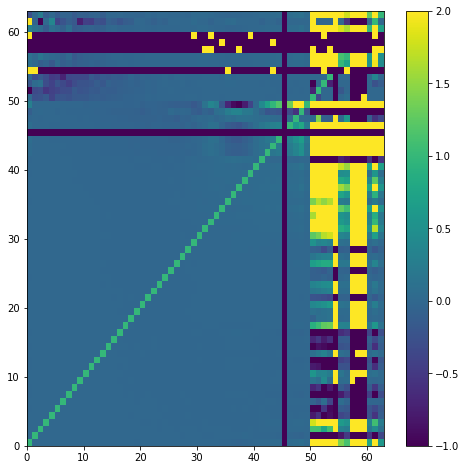

In [94]:
Fhalfinv = diag(F) ** -0.5
fac = Fhalfinv[:, None] * Fhalfinv[None, :]
figure(figsize=(8, 8))
#M3 = numpy.eye(F.shape[0]) / (F.sum(axis=1)[:, None])
pcolormesh(
   # config.parametrization.tags, config.parametrization.tags,
        fac * F,
          vmin=-1, vmax=2
          )
colorbar()
#xlim(50, 60)

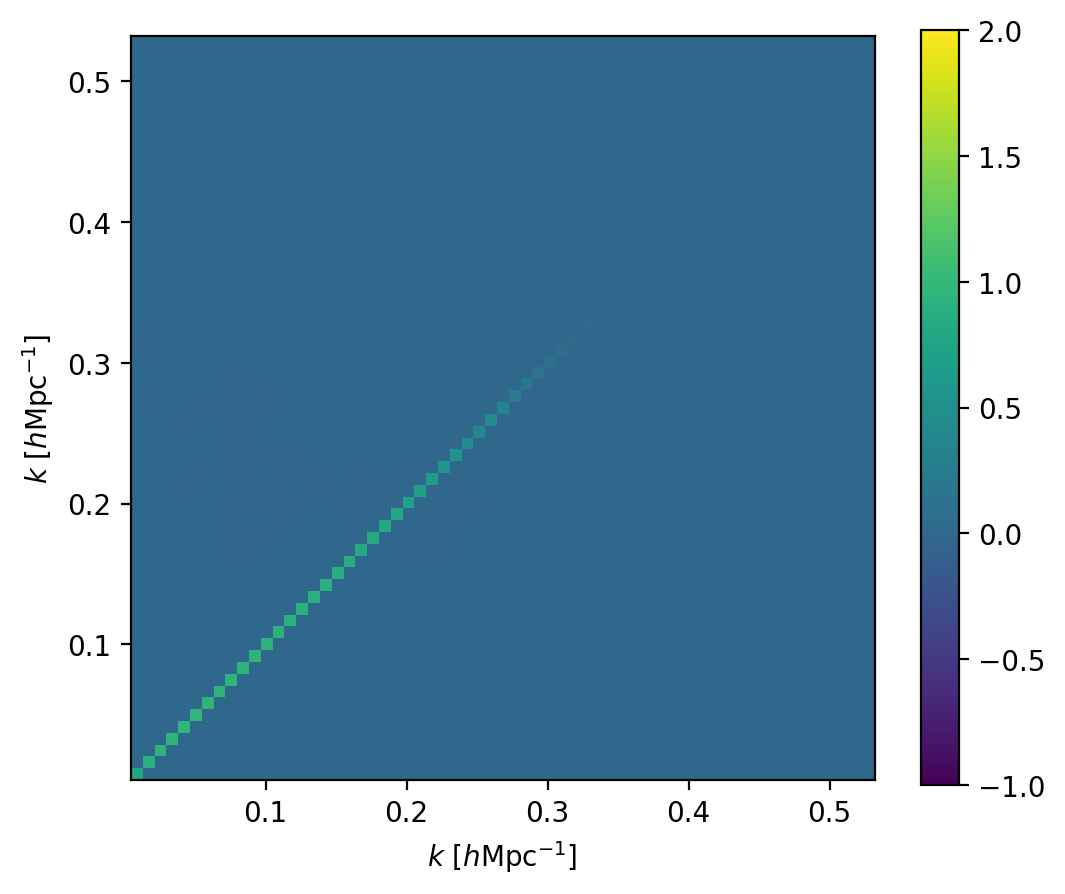

In [242]:
figure(figsize=(6, 5), dpi=200)
ax = gca()
a = config.parametrization.kedges[0]
b = config.parametrization.kedges[-1]
im = ax.imshow(T.T, vmin=-1, vmax=2,
               
               interpolation='nearest', origin='lower', extent=(a, b, a, b))

colorbar(im)
ax.set_aspect(1.0)
ax.set_xlabel(r'$k$ [$h\mathrm{Mpc}^{-1}$]')
ax.set_ylabel(r'$k$ [$h\mathrm{Mpc}^{-1}$]')
#ax.set_title('<T>')
savefig(config.makepath('Grigor-NormalizedFisher.pdf'))
savefig(config.makepath('Grigor-NormalizedFisher.eps'))
#savefig(config.makepath('Grigor-NormalizedFisher.png'), dpi=300)

In [210]:
textstyle = dict(ha='center', va='top', 
         bbox={'facecolor': 'white', 'pad': 2 , 'edgecolor': 'none'},
       fontweight='bold')

In [186]:
s = config.load_map('naive-map-shat', 's')
s_truth = config.load_map('naive-map-shat', 's_truth')
s10 = config.load_map('naive-map-0010', 's')

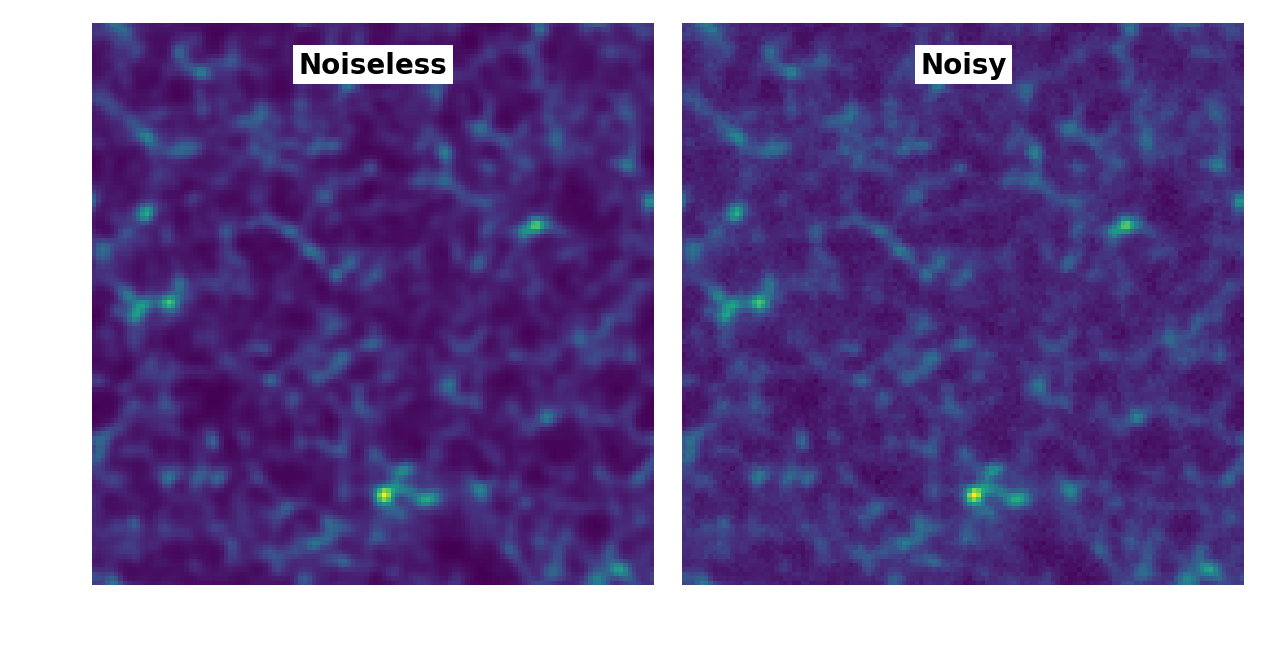

In [351]:
figure(figsize=(6, 3), dpi=200)
data_pure = config.load_map('naive-map-shat', 'data_pure')
noise = config.load_map('naive-map-shat', 'noise')
imstyle=dict(origin='lower', interpolation='nearest')
gs = GridSpec(1, 2, wspace=0.05, left=0.02, right=0.98, top=0.98, bottom=0.02)
ax = subplot(gs[0, 0])
ax.axison=False
imshow(data_pure[..., :4].sum(axis=-1).T, **imstyle)
ax.text(0.5, 0.95, "Noiseless", transform=ax.transAxes, **textstyle)
ax = subplot(gs[0, 1])
ax.axison=False
imshow((data_pure + noise)[..., :4].sum(axis=-1).T,**imstyle)
ax.text(0.5, 0.95, "Noisy", transform=ax.transAxes, **textstyle)

savefig(config.makepath("Grigor-Data.eps"))
savefig(config.makepath("Grigor-Data.pdf"))


In [222]:
dlin_k_shat = config.forward_model.compute(s, 'dlinear_k')
dlin_k_struth = config.forward_model.compute(s_truth, 'dlinear_k')
dlin_k_s10 = config.forward_model.compute(s10, 'dlinear_k')

dNL_shat = config.forward_model.compute(s, 'density').r2c()
dNL_struth = config.forward_model.compute(s_truth, 'density').r2c()
dNL_s10 = config.forward_model.compute(s10, 'density').r2c()

In [23]:
from nbodykit.lab import *

/global/homes/y/yfeng1/.conda/envs/bccp/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide
/global/homes/y/yfeng1/.conda/envs/bccp/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide
/global/homes/y/yfeng1/.conda/envs/bccp/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide
/global/homes/y/yfeng1/.conda/envs/bccp/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide
/global/homes/y/yfeng1/.conda/envs/bccp/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


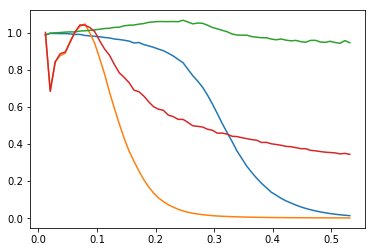

In [223]:
r1 = FFTPower(dlin_k_shat, mode='1d')
r10 = FFTPower(dlin_k_s10, mode='1d')
r2 = FFTPower(dlin_k_struth, mode='1d')
tf = (r1.power['power'] / r2.power['power']) ** 0.5
tf10 = (r10.power['power'] / r2.power['power']) ** 0.5
r1 = FFTPower(dNL_shat, mode='1d')
r10 = FFTPower(dNL_s10, mode='1d')
r2 = FFTPower(dNL_struth, mode='1d')
tf_NL = (r1.power['power'] / r2.power['power']) ** 0.5
tf10_NL = (r10.power['power'] / r2.power['power']) ** 0.5
ktf = r2.power['k']

mask = ~isnan(tf)

ktf = ktf[mask]
tf = tf[mask]
tf10 = tf10[mask]
tf_NL = tf_NL[mask]
tf10_NL = tf10_NL[mask]
plot(ktf, tf)
plot(ktf, tf10)
plot(ktf, tf_NL)
plot(ktf, tf10_NL)

In [324]:
def correct_power(k, v):
    k2 = sum(ki **2 for ki in k)
    return v * interp(k2**0.5, ktf, tf)

def correct_power_NL(k, v):
    k2 = sum(ki **2 for ki in k)
    return v * interp(k2**0.5, ktf, tf_NL)
"""
def correct_power10(k, v):
    k2 = sum(ki **2 for ki in k)
    return v / interp(k2**0.5, ktf, tf10)
def correct_power10_NL(k, v):
    k2 = sum(ki **2 for ki in k)
    return v / interp(k2**0.5, ktf, tf10_NL)
"""

'\ndef correct_power10(k, v):\n    k2 = sum(ki **2 for ki in k)\n    return v / interp(k2**0.5, ktf, tf10)\ndef correct_power10_NL(k, v):\n    k2 = sum(ki **2 for ki in k)\n    return v / interp(k2**0.5, ktf, tf10_NL)\n'

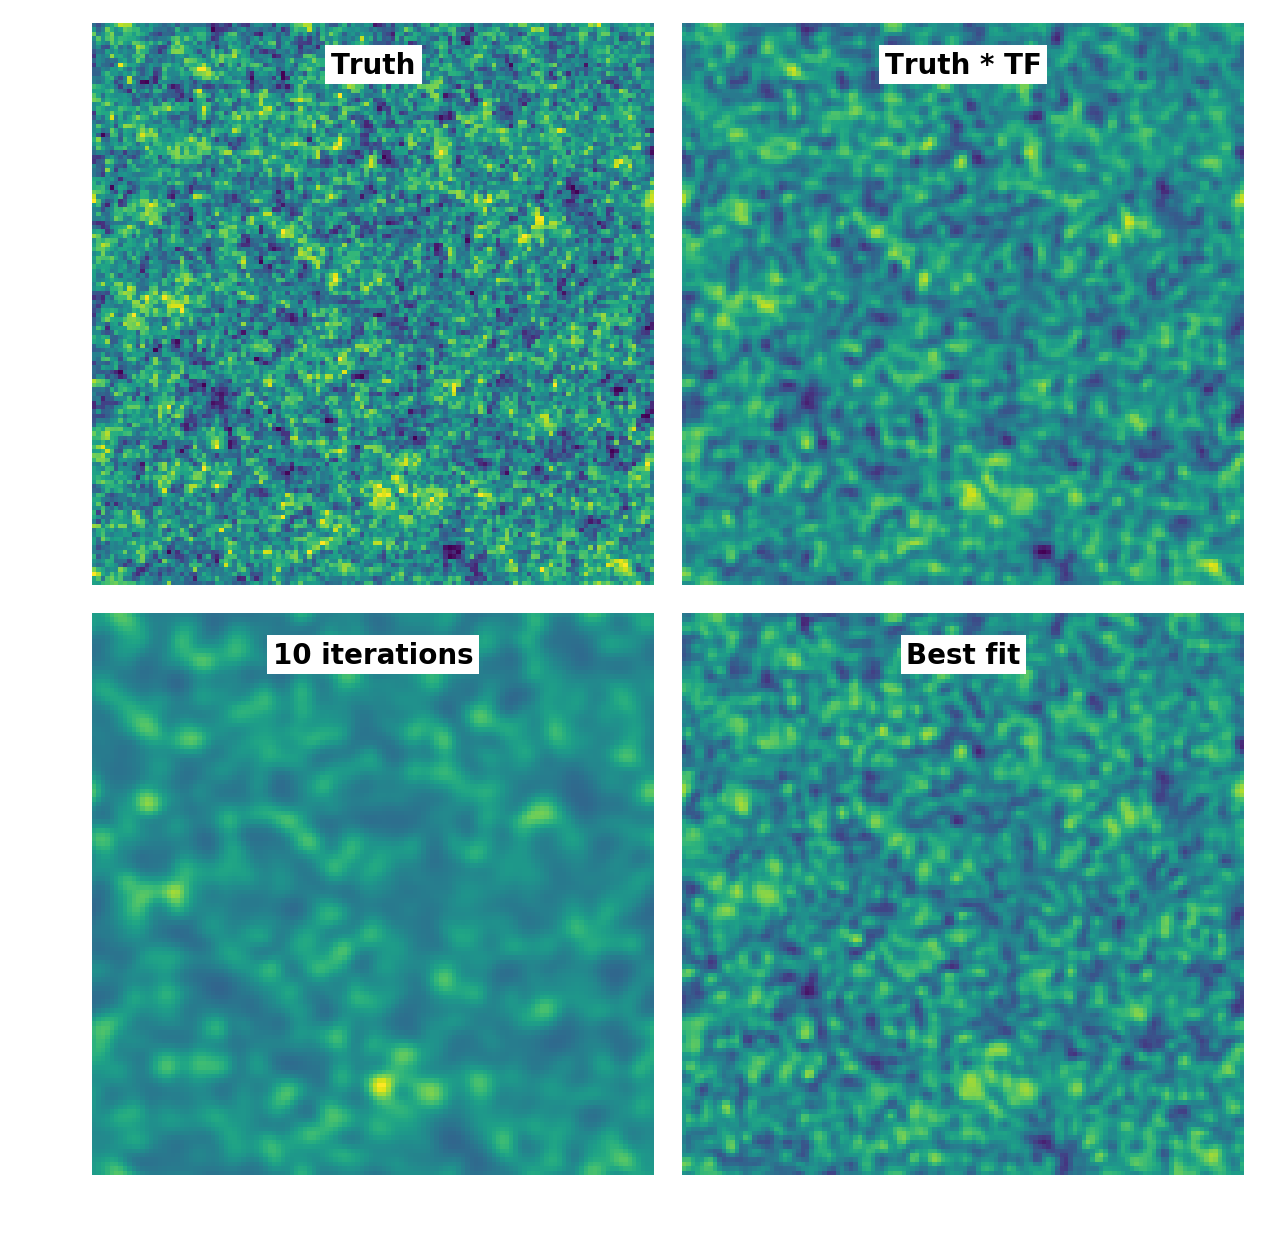

In [352]:
figure(figsize=(6, 6), dpi=200)
gs = GridSpec(2, 2, wspace=0.05, hspace=0.05 , left=0.02, right=0.98, top=0.98, bottom=0.02)
ax = subplot(gs[0, 0])
ax.axison = False
imstyle = dict( vmin=-12, vmax=12, origin='lower', interpolation='nearest')
#imstyle = dict( vmin=-75, vmax=75, origin='lower', interpolation='nearest')
#imshow(dlin_k_struth.preview(axes=[0, 1]).T, ** imstyle)
imshow(dlin_k_struth.c2r()[..., :4].sum(axis=-1).T, ** imstyle)
ax.text(0.5, 0.95, "Truth", transform=ax.transAxes, **textstyle)
ax = subplot(gs[1, 1])
ax.axison = False
imshow(dlin_k_shat.c2r()[..., :4].sum(axis=-1).T, ** imstyle)
ax.text(0.5, 0.95, "Best fit", transform=ax.transAxes, **textstyle)
ax = subplot(gs[0, 1])
ax.axison = False
ax.text(0.5, 0.95, "Truth * TF", transform=ax.transAxes, **textstyle)
imshow(dlin_k_struth.apply(correct_power).c2r()[..., :4].sum(axis=-1).T,  ** imstyle)
ax=subplot(gs[1, 0])
ax.axison = False
imshow(dlin_k_s10.c2r()[..., :4].sum(axis=-1).T, **imstyle)
ax.text(0.5, 0.95, "10 iterations", transform=ax.transAxes, **textstyle)
savefig(config.makepath("Grigor-Visual.eps"))
savefig(config.makepath("Grigor-Visual.pdf"))

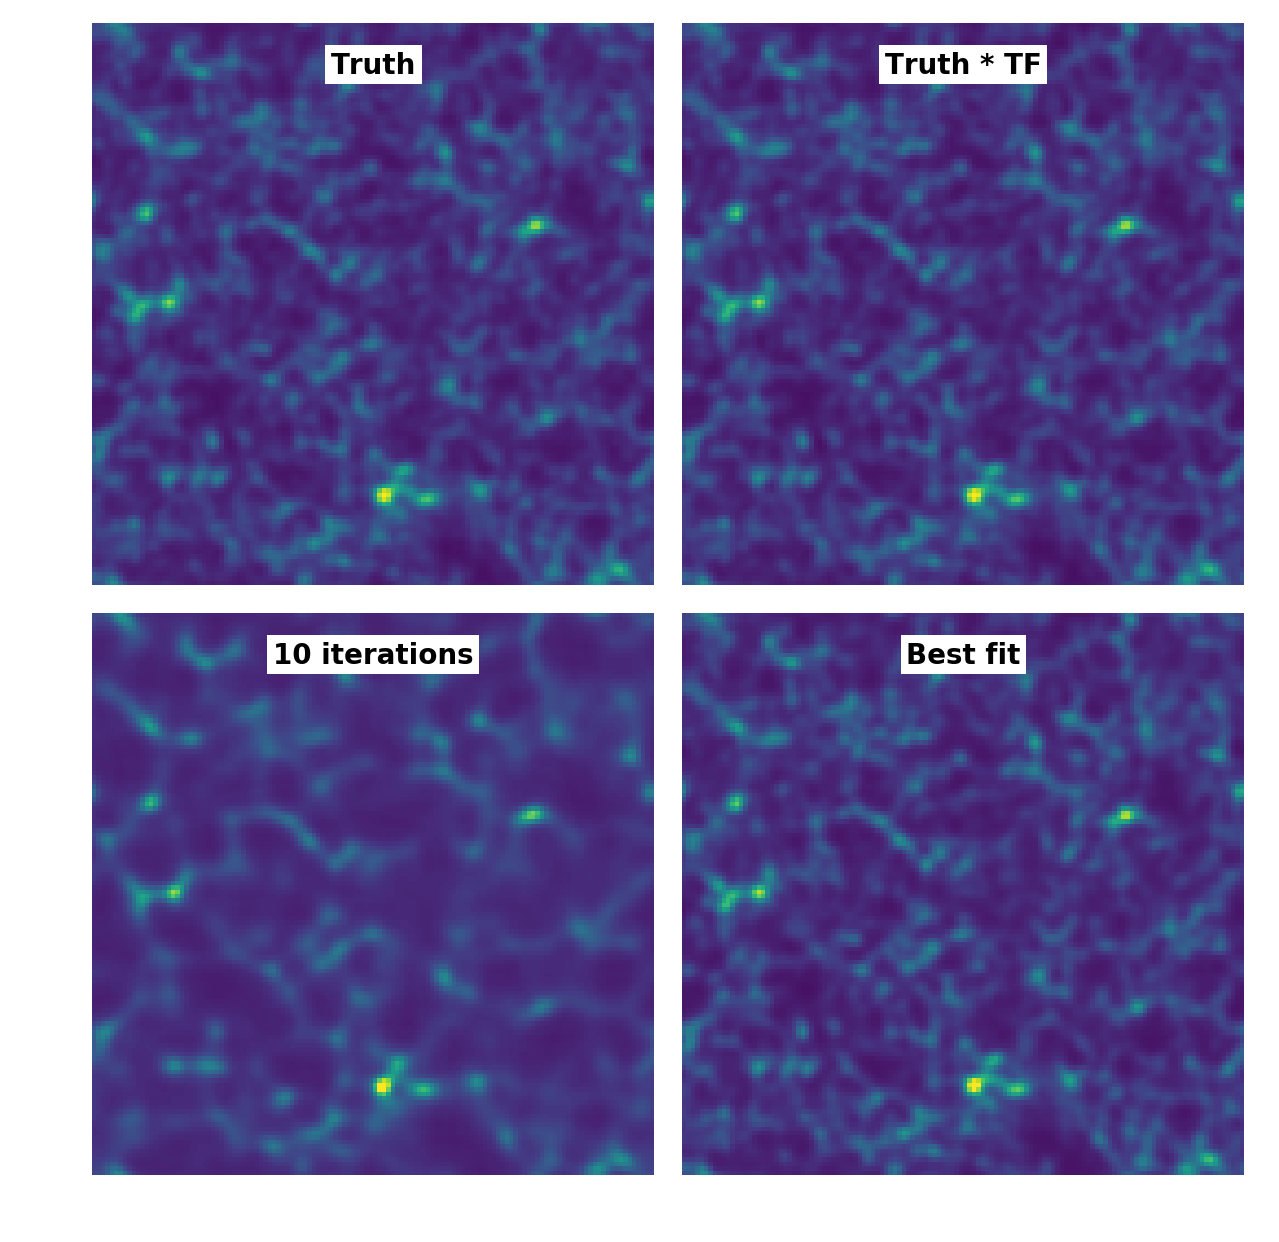

In [354]:
figure(figsize=(6, 6), dpi=200)
gs = GridSpec(2, 2, wspace=0.05, hspace=0.05, left=0.02, right=0.98, top=0.98, bottom=0.02)
ax = subplot(gs[0, 0])
ax.axison = False
imstyle = dict(vmin=128-50, vmax=128+50, origin='lower', interpolation='nearest')
imstyle = dict(vmin=0, vmax=24, origin='lower', interpolation='nearest')

imshow(dNL_struth.c2r()[..., :4].sum(axis=-1).T, **imstyle)
ax.text(0.5, 0.95, "Truth", transform=ax.transAxes, **textstyle)
ax = subplot(gs[1, 1])
ax.axison = False

imshow(dNL_shat.c2r()[..., :4].sum(axis=-1).T, **imstyle)
ax.text(0.5, 0.95, "Best fit", transform=ax.transAxes, **textstyle)
ax = subplot(gs[0, 1])
ax.axison = False
ax.text(0.5, 0.95, "Truth * TF", transform=ax.transAxes, **textstyle)
imshow(dNL_struth.apply(correct_power_NL).c2r()[..., :4].sum(axis=-1).T, **imstyle)
ax=subplot(gs[1, 0])
ax.axison = False
imshow(dNL_s10.c2r()[..., :4].sum(axis=-1).T,  **imstyle)
ax.text(0.5, 0.95, "10 iterations", transform=ax.transAxes, **textstyle)
savefig(config.makepath("Grigor-Visual-NL.eps"))
savefig(config.makepath("Grigor-Visual-NL.pdf"))

In [146]:
s0, dNL_nowig = config.reality_model.generate(300, config.FiducialPS, unitary=True)
s0, dNL_wig = config.reality_model.generate(300, config.TruthPS, unitary=True)

In [283]:
#Pdata = config.parametrization.estimate((dNL_wig.r2c() / dNL_nowig.r2c()).c2r())
Pdata = config.parametrization.estimate((dNL_wig)) /config.parametrization.estimate(dNL_nowig)
Punitary = config.parametrization.estimate(s0)

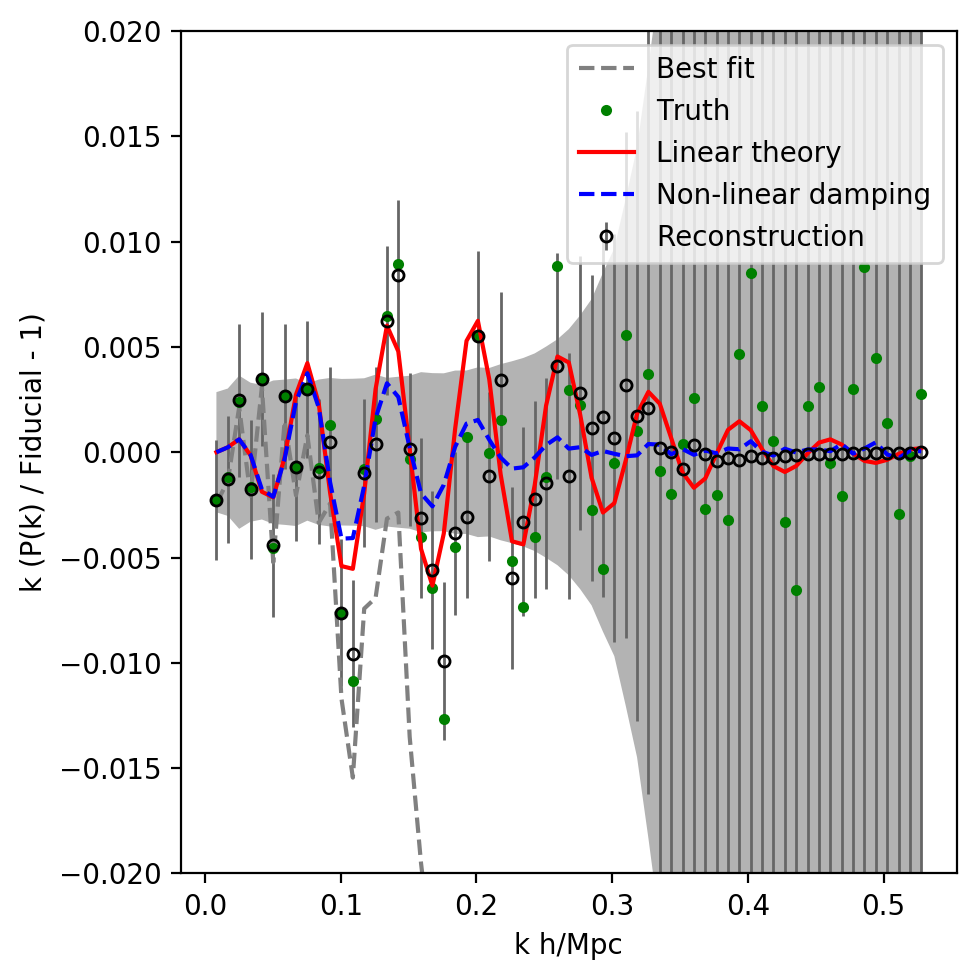

In [322]:
#plot(diag(F))
figure(figsize=(5, 5), dpi=200)
use = config.parametrization.tags < 10

estyle=dict(color='k', ls='none', marker='o', markersize=4, markeredgecolor='k', 
            markerfacecolor='none',
         capsize=0, elinewidth=1, ecolor=(0.4, 0.4, 0.4),)

err = ((Phat0 / Ptruth0) ** 2 * numpy.diag(K)) ** - 0.5 / Ptruth0
err2 =  numpy.diag(K) ** - 0.5 / Ptruth0
k = config.parametrization.tags

fill_between(k, k * err, 
               -k * err, color=(0.7, 0.7, 0.7), linewidth=0, interpolate=True)

errorbar(k[use], 
         k[use] * ((Phat + Ptruth0 - Phat0) / Ptruth0 - 1)[use],          
         k[use] * (err)[use],  label='Reconstruction',**estyle)

#plot(k, k * ((Phat + Ptruth0 - Phat0) / Ptruth0 - 1), 'o', color='none', 
#     markeredgecolor='k', label='Reconstruction')



plot(k, k * (Phat / Ptruth0-1), label='Best fit', color='gray', ls='--')


plot(k, k * (Ptruth / Ptruth0-1), '.', label='Truth', color='green')

plot(k, k * (Punitary / Ptruth0 - 1), label='Linear theory', color='red', ls='-')

plot(k, k * (Pdata -1), label='Non-linear damping', color='blue', ls='--')
#xscale('log')
#grid()
legend()
ylim(-0.02, 0.02)
xlabel('k h/Mpc')
ylabel('k (P(k) / Fiducial - 1)')
tight_layout()
savefig(config.makepath("Grigor-PS.eps"))
savefig(config.makepath("Grigor-PS.pdf"))

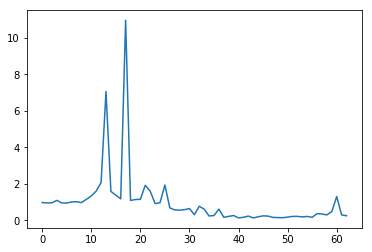

In [129]:
plot(Pdata)

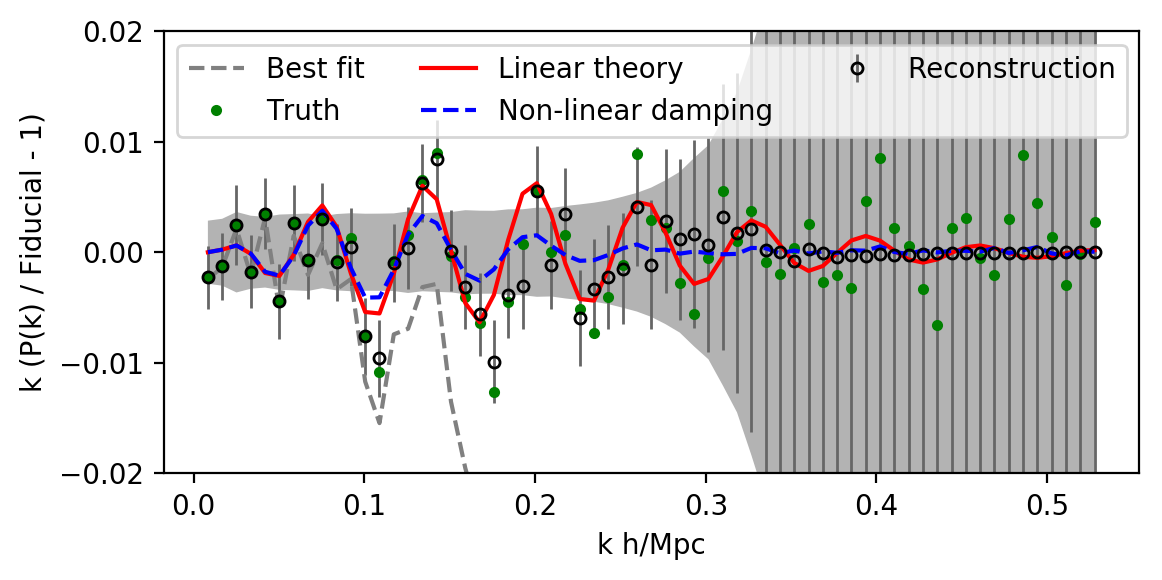

In [359]:
#plot(diag(F))
figure(figsize=(6, 3), dpi=200)
use = config.parametrization.tags < 10

estyle=dict(color='k', ls='none', marker='o', markersize=4, markeredgecolor='k', 
            markerfacecolor='none',
         capsize=0, elinewidth=1, ecolor=(0.4, 0.4, 0.4),)

err = ((Phat0 / Ptruth0) ** 2 * numpy.diag(K)) ** - 0.5 / Ptruth0
err2 =  numpy.diag(K) ** - 0.5 / Ptruth0
k = config.parametrization.tags

fill_between(k, k * err, 
               -k * err, color=(0.7, 0.7, 0.7), linewidth=0, interpolate=True)

errorbar(k[use], 
         k[use] * ((Phat + Ptruth0 - Phat0) / Ptruth0 - 1)[use],          
         k[use] * (err)[use],  label='Reconstruction',**estyle)

#plot(k, k * ((Phat + Ptruth0 - Phat0) / Ptruth0 - 1), 'o', color='none', 
#     markeredgecolor='k', label='Reconstruction')



plot(k, k * (Phat / Ptruth0-1), label='Best fit', color='gray', ls='--')


plot(k, k * (Ptruth / Ptruth0-1), '.', label='Truth', color='green')

plot(k, k * (Punitary / Ptruth0 - 1), label='Linear theory', color='red', ls='-')

plot(k, k * (Pdata -1), label='Non-linear damping', color='blue', ls='--')
#xscale('log')
#grid()
legend(ncol=3, loc='upper left')
ylim(-0.02, 0.02)
xlabel('k h/Mpc')
ylabel('k (P(k) / Fiducial - 1)')
tight_layout()
savefig(config.makepath("Grigor-PS-thin.pdf"))